# Machine learning
## Parte 1: Comenzando con el Machine learning: Un poco de limpieza y transformación de datos.
---


## Seguimos con un poco de limpieza de datos






### 1. Varianza en los datos
---


A esto nos referimos a que tanto varían los datos, ya que de acuerdo a esto le aportaría más info a nuestro modelo, así nuestro modelito tendría más info y podría encontrar más patrones en los datos. **Por ejemplo**, si tenemos más varianza en el ancho de petalos de flores, nuestro modelo sabría de mejor manera cómo categorizar cada flor.


Las columnas que no tengan mucha varianza pueden eliminarse puesto que no aportan mucha información. **Por ejemplo**, si tenemos una columna (feature) donde solo hay dos opciones (ej. Grande o chico) y en todas las filas tenemos "Grande", esa columna no nos aportaría nada puesto que se considera constante, por lo que podríamos eliminarla.

### 2. Correlación
---



En las columnas numéricas, la **correlación** nos ayuda para saber que variables utilizar o cuales no como primera observacion de los datos.

La **correlación** nos mide la relacion que hay entre dos variables

- Si dos variables tienen una **correlación** muy alta, prácticamente ambas variables tienen la misma info.
> **Nota**: No implica **causalidad**.
 Osease que aunque dos variables estén relacionadas (es decir, tengan una correlación), esto no significa necesariamente que una cause a la otra.


Se mide generalmente usando el coeficiente de correlación (más comúnmente el coeficiente de **Pearson**), que toma un valor entre -1 y 1:
> El **coeficiente de correlación de Pearson** mide la fuerza y la dirección de una relación lineal entre dos variables cuantitativas.

- 1 indica una correlación positiva perfecta: A medida que una variable aumenta, la otra también lo hace en la misma proporción.
- -1 indica una correlación negativa perfecta: A medida que una variable aumenta, la otra disminuye en la misma proporción.
- 0 indica que no hay correlación (no hay relación lineal).



Consejos:
- Si dos variables tienen una correlación alta entre sí, pueden proporcionar información redundante a un modelo. Esto puede generar sobreajuste (overfitting) y aumentar la complejidad innecesariamente. En este caso, se suele eliminar una de las variables correlacionadas.


#### **Tipos de correlación**


- **Correlación positiva**: Si los valores de una variable aumentan, los de la otra también tienden a aumentar. Ejemplo: la cantidad de horas estudiadas y la calificación obtenida en un examen.

- **Correlación negativa**: Si una variable aumenta, la otra tiende a disminuir. Ejemplo: la cantidad de ejercicio físico y el peso corporal en ciertas personas.

- **Correlación nula o baja**: No hay una relación lineal clara entre dos variables. Ejemplo: la cantidad de café que una persona bebe y su rendimiento académico (en algunos casos, podría no haber una relación clara).

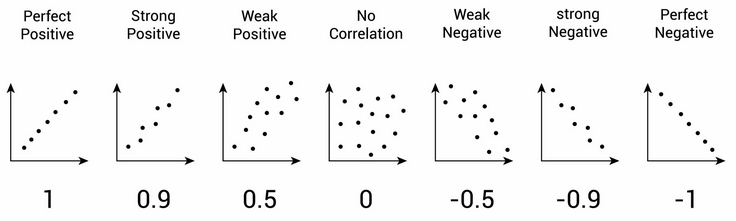

Para ver los coeficientes de correlación podemos usar la Matriz de Correlación

La Matriz de Correlación nos calcula los coeficientes de Pearson de cada variable con las demás :D


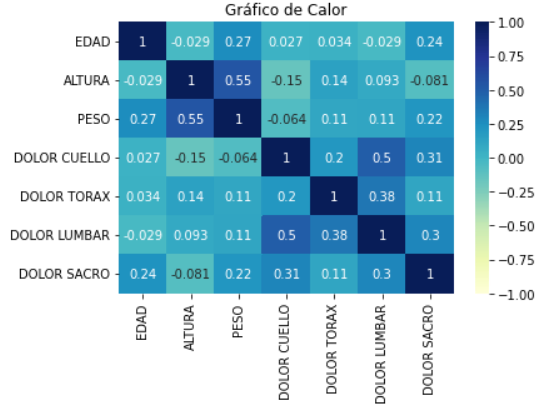

Calcular esta matriz es muy izi pizi lemon squezy con pandas y matplotlib.
En la sección de práctica lo veremos.

### 3. Distribución normal (Gaussiana)
---



Ya lo hemos visto un poco, pero básicamente representa cómo se distribuyen los datos en torno a un valor central y tiene una forma simétrica de campana.



Recordemos que tiene un par de características importantes:
1. **Simetría**: La distribución normal es simétrica respecto a su media. Esto significa que la mitad de los valores se encuentran a la derecha de la media y la otra mitad a la izquierda, con un comportamiento idéntico en ambos lados.
2. **Campana de Gauss**: La forma de la curva es de campana, con la mayor concentración de datos cerca de la media. A medida que te alejas de la media, los valores en los extremos (colas) son menos frecuentes.
  > También nos ayudan a identificar outliers C:
3. **Media, mediana y moda iguales**: En una distribución normal, la media, la mediana y la moda son iguales y están situadas en el centro de la distribución. La media es el valor central, y el 50% de los datos están por debajo de ella y el otro 50% por encima.
4. **Distribución de la varianza**: La forma de la curva está controlada por dos parámetros:

    - La media (μ): determina la posición de la curva en el eje horizontal (dónde está centrada).
    - La desviación estándar (σ): mide la dispersión de los datos. Cuanto mayor es la desviación estándar, más ancha y plana es la curva. Una desviación estándar pequeña hace que la curva sea más estrecha y puntiaguda.

### 4. EDA (Análisis Exploratorio de los Datos)
---

Es utilizado para comprender las características principales de un conjunto de datos antes de aplicar modelos más complejos. Es un paso preliminar para descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones mediante el uso de estadísticas descriptivas y técnicas visuales.

#### Objetivos


Podemos ver sus objetivos de la siguiente manera:
- **Entender la estructura de los datos**: Identificar el tipo de variables (numéricas, categóricas, etc.), su distribución y relaciones.
- **Identificar patrones**: Ver si hay correlaciones entre variables o tendencias a través del tiempo.
- **Detectar anomalías**: Identificar valores atípicos (outliers) o inconsistencias en los datos.
- **Guiar el modelado**: Ayudar a seleccionar las variables relevantes para los modelos predictivos y elegir las técnicas más adecuadas.

Entonces, básicamente es un proceso iterativo donde entendemos los datos, los visualizamos y de acuerdo a las conclusiones limpiamos los datos.

> Podemos diferenciar a un **Científico de datos** buenazo a uno equisde si es que sabe entender los datos, sabe preguntar a las personas del negocio de donde vienen los datos, como funcionan, que significan, que explica, y si se entienden los datos los podrán limpiar mejor, y obtener mejores resultados :D

## Parte práctica: Limpieza de datos PT. 2

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import  SimpleImputer

data=pd.read_csv('train.csv')

Comprendamos las variables >:D

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Después de que hayamos investigado, descubrimos las descripciones de las columnas:
- Survived : Sobrevivio o no? 0-1
- Pclass : En que clase viajaba
- Name: Nombre del pasajero
- Sex: Es hombre o mujer?
- Age: Edad del pasajero
- SibSp: Número de hermanos/cónyuges a bordo del Titanic
- Parch: Número de padres/hijos a bordo del Titanic
- Ticket: Número de boleto
- Fare: Tarifa del pasajero
- Embarked: Puerto de embarque

### Varianza en los datos

In [10]:
data.var()

TypeError: could not convert string to float: 'Braund, Mr. Owen Harris'

Errorsillo porque pandas no puede calcular la varianza de columnas categóricas :00

Entonces, vamo a filtrar las columnas numéricas:


In [11]:
# Filtramos las columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Calculamos la varianza solo en las columnas numéricas
variance = numerical_data.var()
print(variance)


PassengerId    66231.000000
Survived           0.236772
Pclass             0.699015
Age              211.019125
SibSp              1.216043
Parch              0.649728
Fare            2469.436846
dtype: float64


Aquí arribita vemos que hay datos con una varianza pequeña y otras con una varianza muuuy grande. Entonces nos damos cuentas que no están en la misma escala.

Ejemplo la edad va de 0 a 80, survived es o 0s o 1s, etc.

Entonces para transformar la varianza lo hacemos con normalización de los datos y escalado de datos para emparejar el terreno para todas las variables :D (y poder analizar la varianza de una mejor manera)


Ahora, para los datos categóricos:

In [12]:
cat_cols=data.select_dtypes(include='O').columns # .select_dtypes(include='O') -> seleccionamos columnas categóricas

for c in cat_cols:
  print('\nColumna :',c)
  print(data[c].value_counts()) # .value_counts() -> Número de observaciones por cada categoría.


Columna : Name
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64

Columna : Sex
Sex
male      577
female    314
Name: count, dtype: int64

Columna : Ticket
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450           

Entonces, vemos que tenemos que en NAME tenemos muchisimas categorías, entonces no nos sirve mucho.

En sex tenemos dos categorías

En ticket igual tenemos como NAME muchisimas categorias.

Y en EMBARKED tenemos tres categorías (3 puertos) .


### Matriz de correlación

<Axes: >

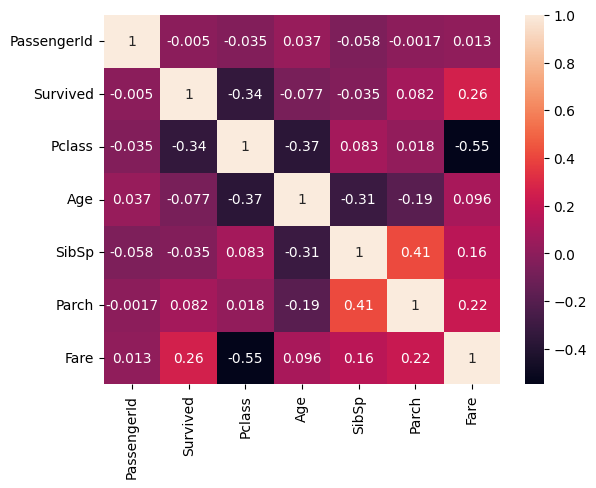

In [13]:
num_cols=data.select_dtypes(include='number').columns # Manera sencilla de escoger columnas numéricas :D

matriz=data[num_cols].corr() # Este .corr() nos calcula el coeficiente de PEARSON de todas las variables.

sns.heatmap(matriz,annot=True) # el annot=true es pa que nos muestre las anotaciones (Osease los valores)

Vemos que si incluimos la variable objetivo (Nuestro caso survived para ver si sobrevive o no) podemos ver como de relacionadas estan el resto de variables con esta.

En este caso sería **Pclass** y **Fare**

### Exploracion visual


Visualizaciones para la columna:  PassengerId


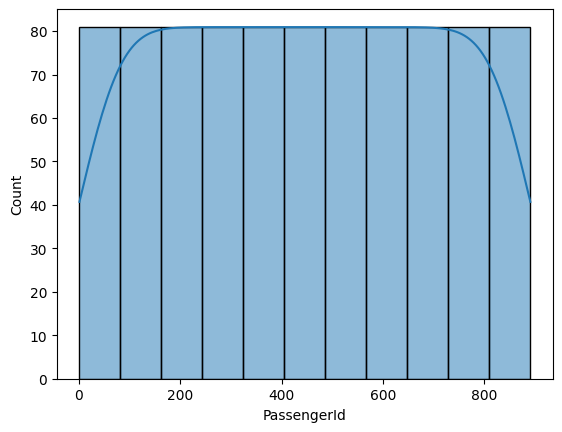

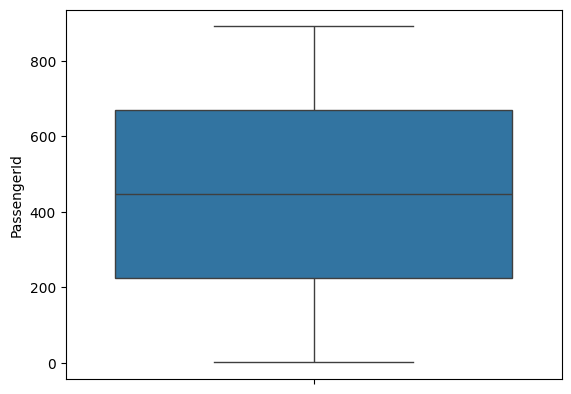


Visualizaciones para la columna:  Survived


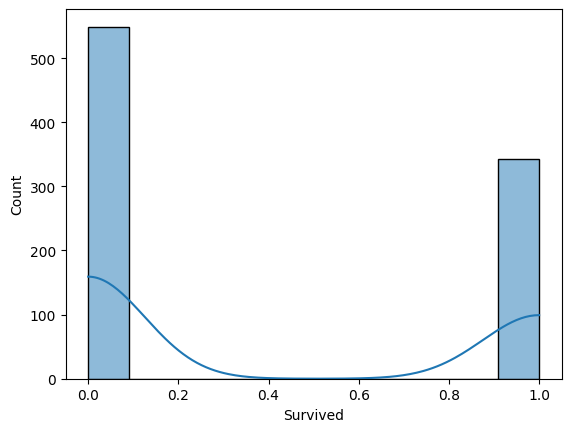

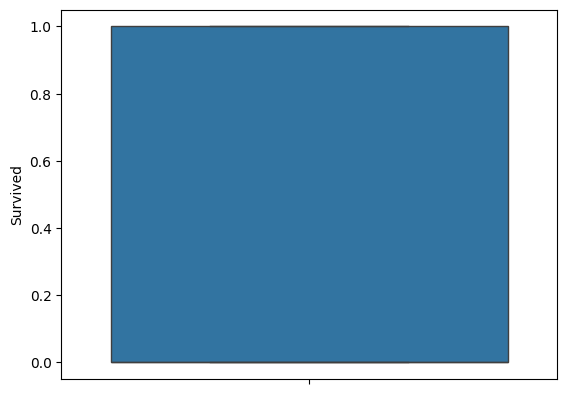


Visualizaciones para la columna:  Pclass


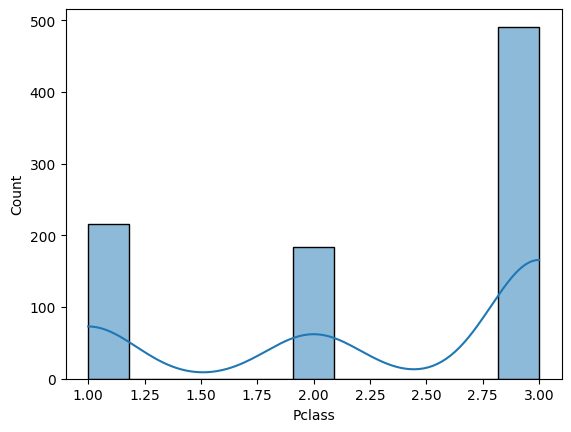

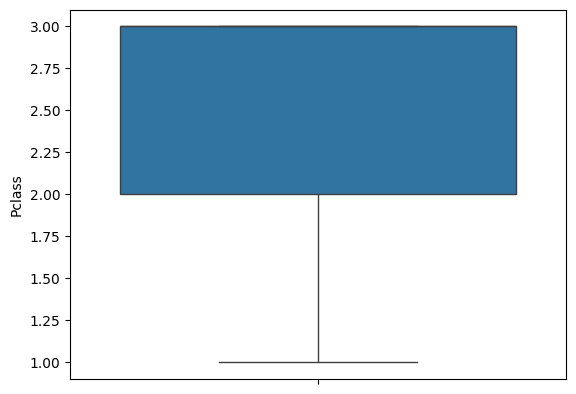


Visualizaciones para la columna:  Age


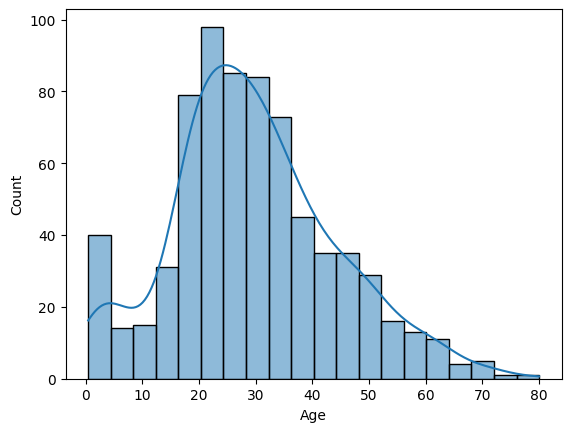

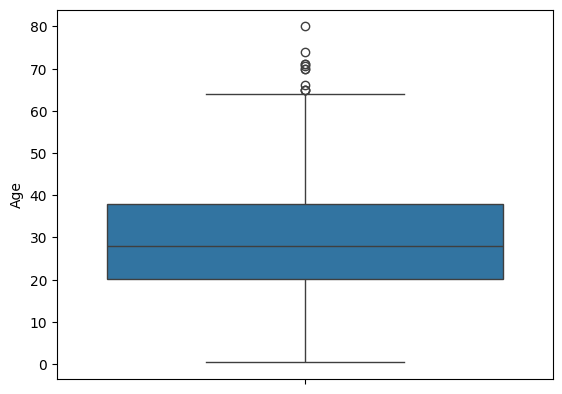


Visualizaciones para la columna:  SibSp


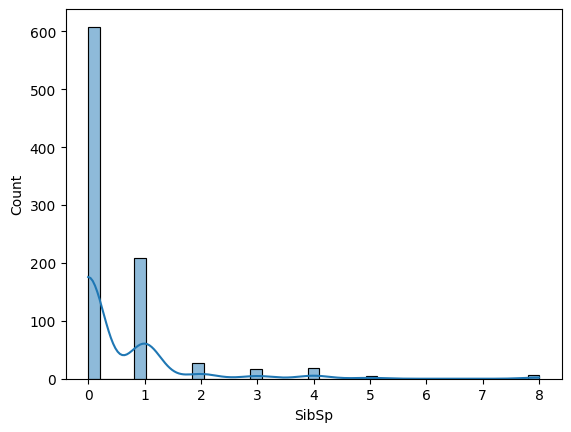

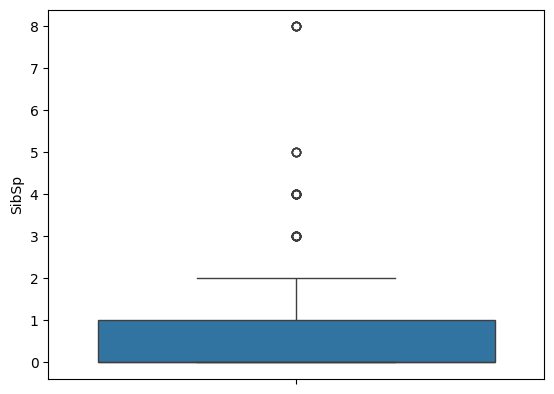


Visualizaciones para la columna:  Parch


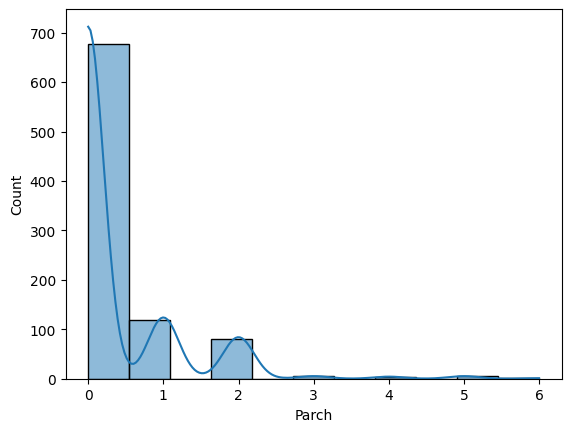

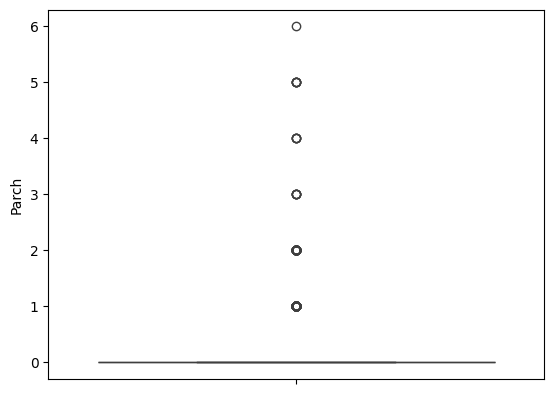


Visualizaciones para la columna:  Fare


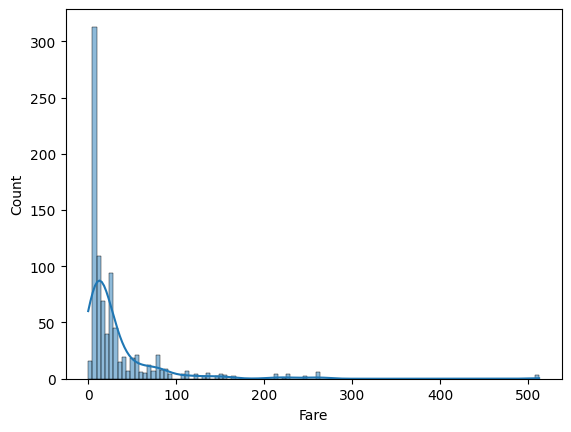

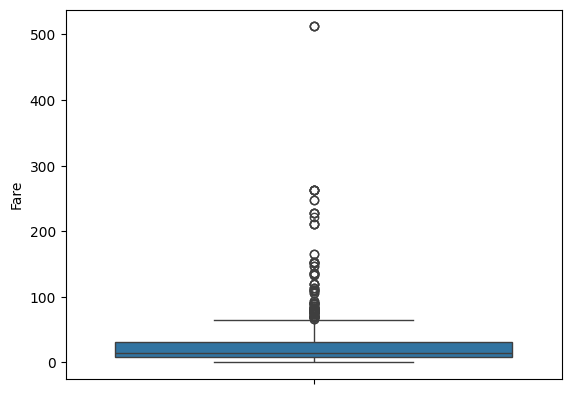

In [14]:
#Columnas numéricas
for col in num_cols:
    print('\nVisualizaciones para la columna: ',col)
    sns.histplot(data[col],kde=True) # Mostrando la distribución de los datos
    plt.show()
    sns.boxplot(data[col]) # para ver si hay outliers
    plt.show()

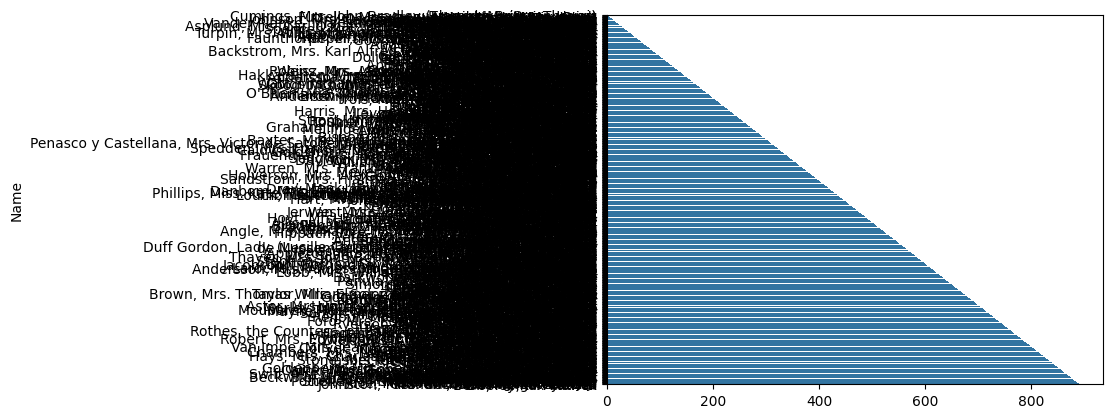

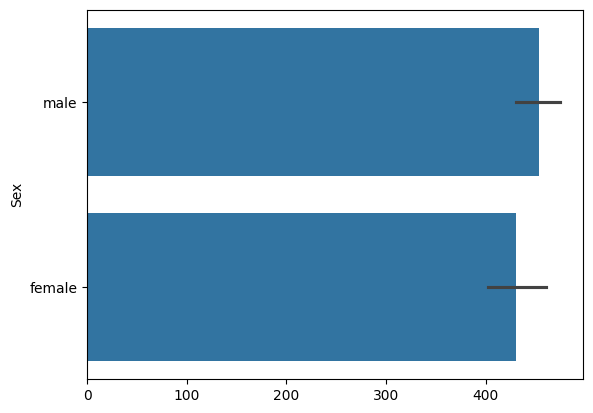

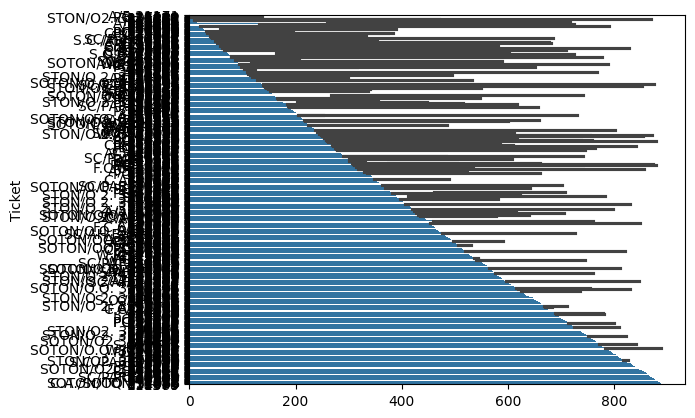

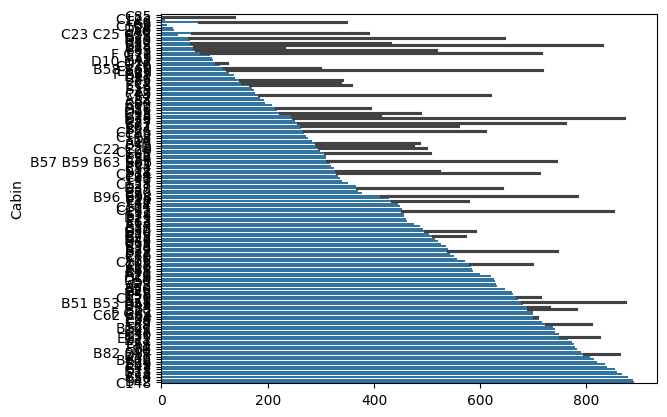

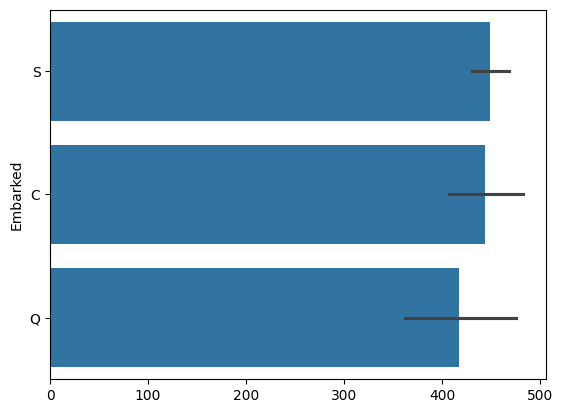

In [15]:
#Columnas categóricas
for c in cat_cols:
  sns.barplot(data[c])
  plt.show()

### Desbalanceo de la var objetivo
Esto mejor no lo vamo a ver XD, no todavía C:

In [16]:
data.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [17]:
data.Survived.value_counts() / len(data)

Survived
0    0.616162
1    0.383838
Name: count, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

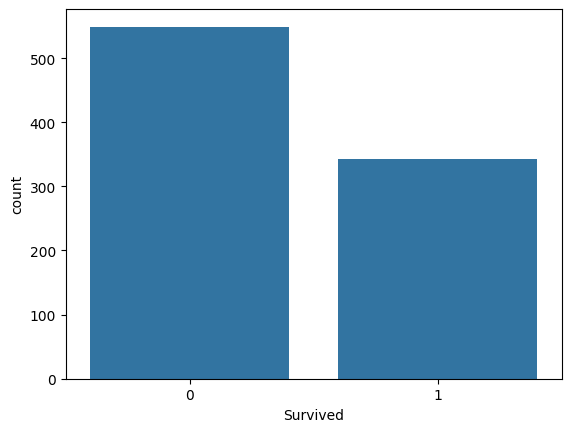

In [18]:
sns.barplot(data['Survived'].value_counts())

Vemos que exite desbalanceo aunque no sea muy severo, pero debemos corregirlo para mejorar la calidad de los datos.

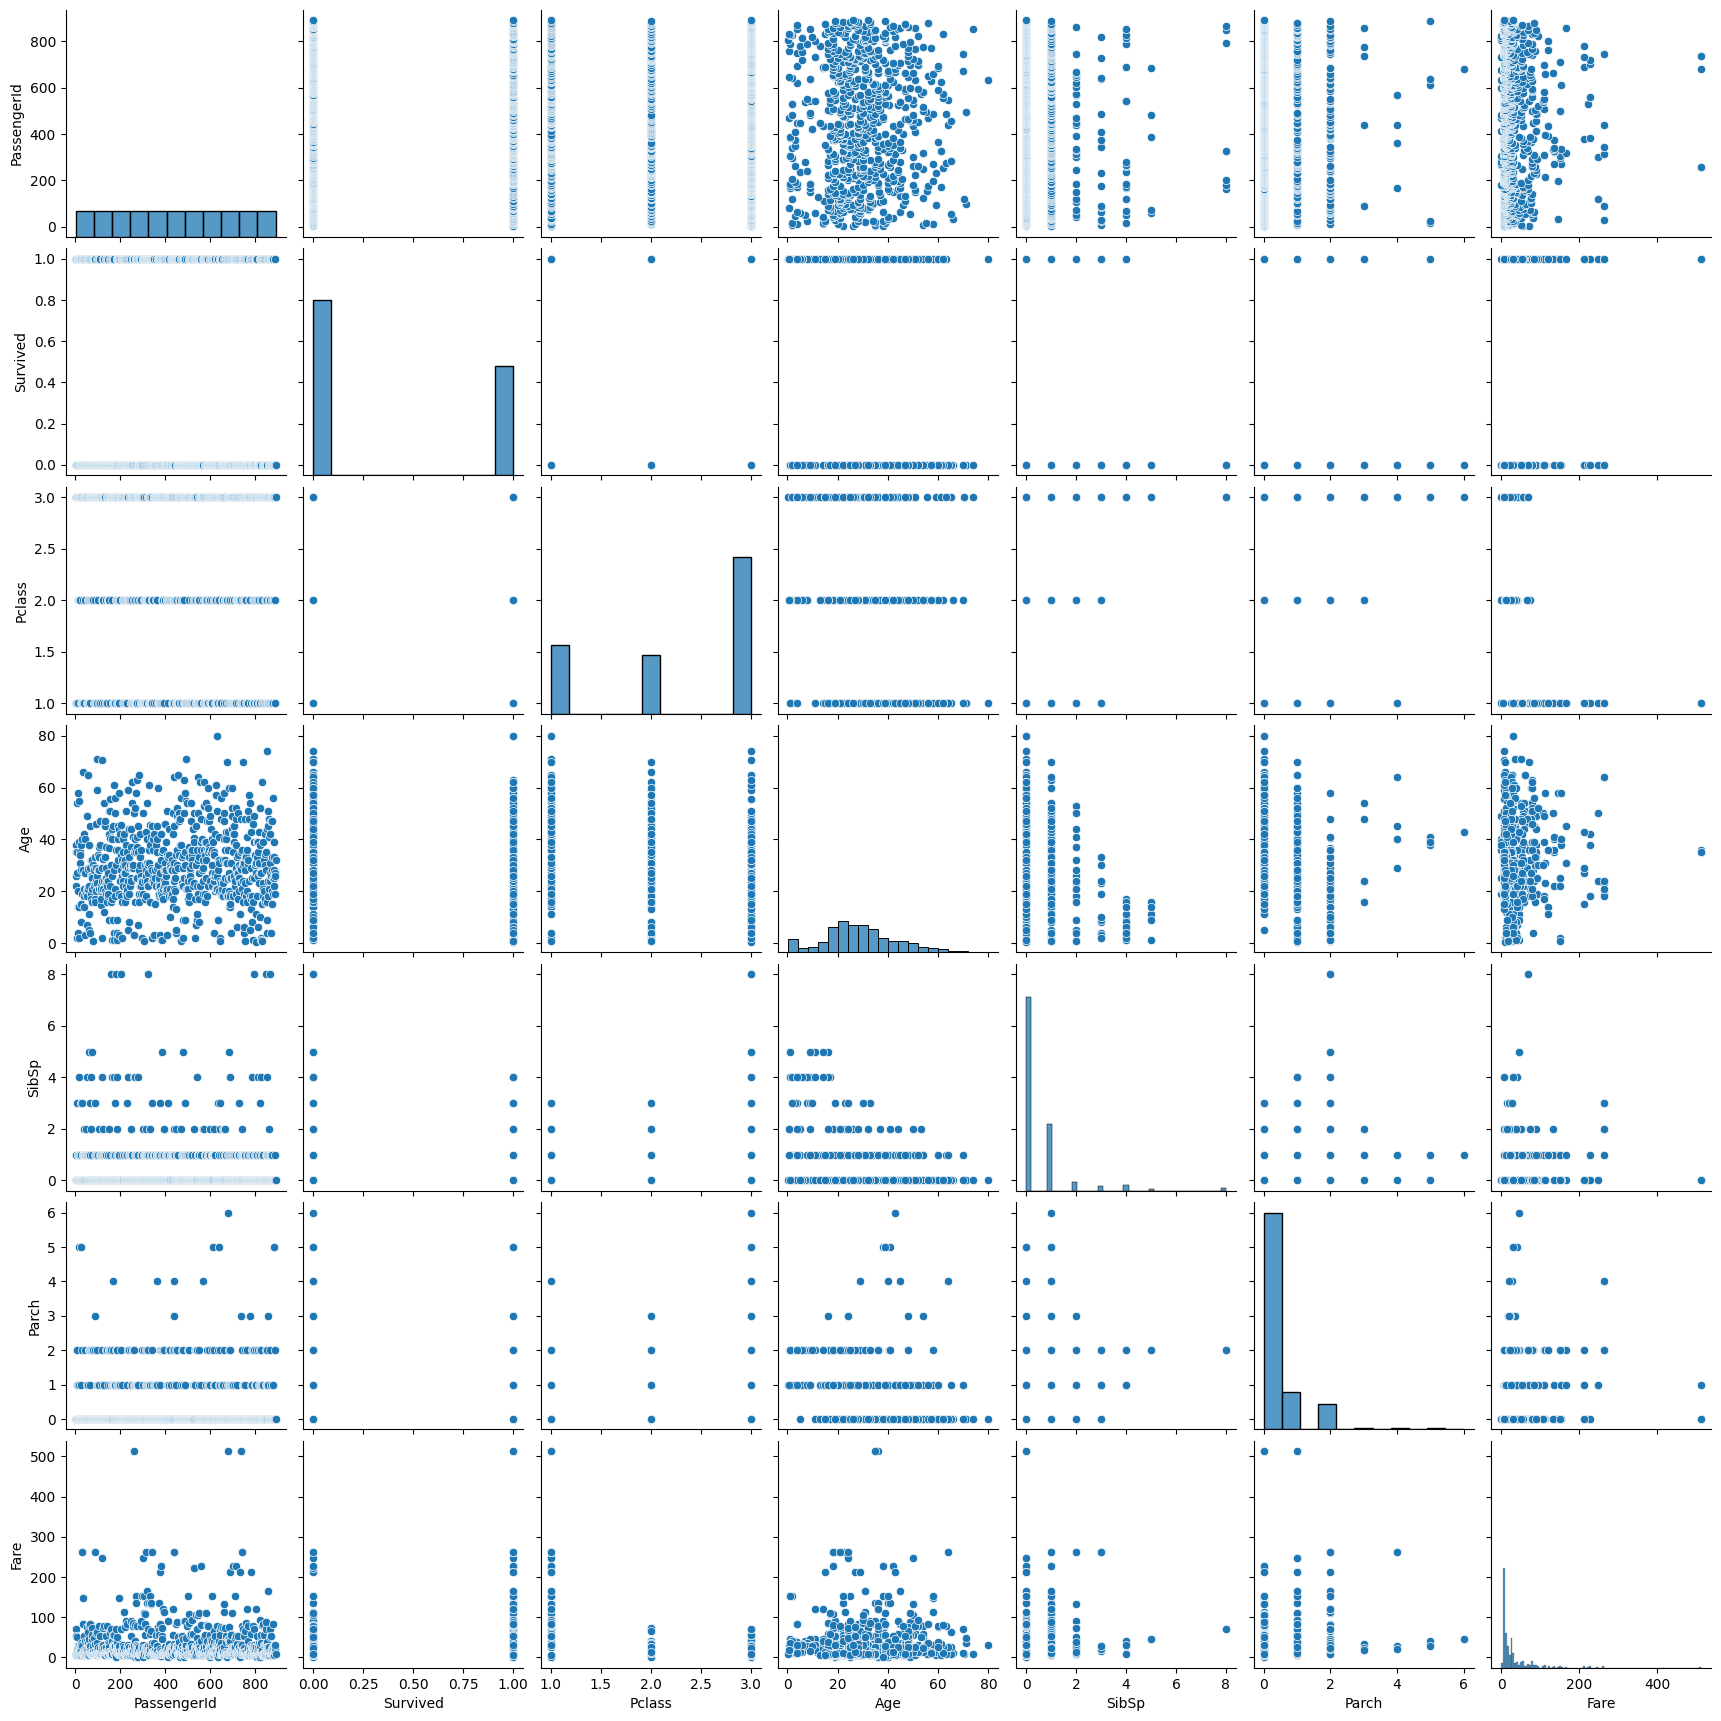

In [19]:
sns.pairplot(data)

## 2. Análisis de datos
---

### 1. Normalización de datos


La normalización de datos es esencial por varias razones:

*   Facilita la comparación: Esto significa que todas las características están en la misma escala, lo que facilita la comparación y la identificación de patrones.

*   Mejora el rendimiento de los modelos: Muchos algoritmos de aprendizaje automático, como las máquinas de soporte vectorial (SVM), las redes neuronales y el análisis de componentes principales (PCA), asumen que los datos están estandarizados. La falta de estandarización puede llevar a un mal rendimiento del modelo.

* Evita problemas de dominación de características: Cuando las características tienen diferentes escalas, las características con valores más grandes pueden dominar las características con valores más pequeños, lo que puede llevar a que el modelo ignore las características más pequeñas. La estandarización evita este problema.


Entonces, quedense con que normalizar los datos es **crucial** para mejorar el rendimiento y eficacia de nuestros modelos, puesto que **transforma las variables para que todas tengan una escala común** sin alterar las diferencias relativas entre los valores :D


#### 1.1 **Ejemplo de la importancia de la normalización de datos:**

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Este método se le conoce como estandarización (media = 0 y desviación estandar = 1)
from sklearn.preprocessing import StandardScaler

In [21]:
# Creando un DataFrame de ejemplo :B
data = {
    'Edad': [25, 30, 35, 40, 45, 78],
    'Ingreso mensual (en miles)': [35, 50, 70, 90, 120,  600]
}

df = pd.DataFrame(data)
df

,Edad,Ingreso mensual (en miles)
0,25,35
1,30,50
2,35,70
3,40,90
4,45,120
5,78,600


In [22]:
# Calcular el promedio de la columna "Edades"
promedio_edades = df['Edad'].mean()

print("Promedio de Edades:", promedio_edades)

Promedio de Edades: 42.166666666666664


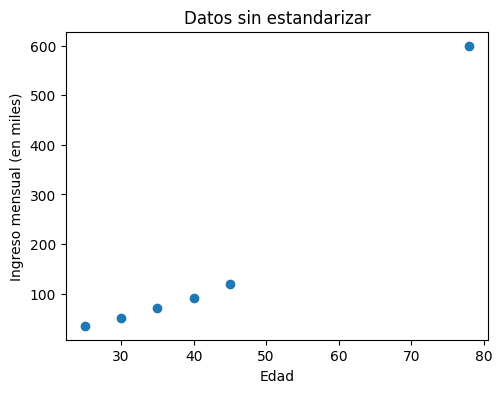

In [23]:
# Graficar los datos antes de la estandarización
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(df['Edad'], df['Ingreso mensual (en miles)'])
plt.title('Datos sin estandarizar')
plt.xlabel('Edad')
plt.ylabel('Ingreso mensual (en miles)')
plt.show()

In [24]:
#Estandarizar las características numéricas.
scaler = StandardScaler()
df[['Edad', 'Ingreso mensual (en miles)']] = scaler.fit_transform(df[['Edad', 'Ingreso mensual (en miles)']])
# Consejo: Las columnas que pongamos del lado izquierdo deben ser las mismas a las del lado derecho
df

,Edad,Ingreso mensual (en miles)
0,-0.993651,-0.634583
1,-0.704238,-0.558937
2,-0.414825,-0.458076
3,-0.125412,-0.357215
4,0.164001,-0.205924
5,2.074127,2.214735


In [25]:
# Calcular el promedio de la columna "Edades"
promedio_edades = df['Edad'].mean()

print("Promedio de Edades:", promedio_edades)

Promedio de Edades: 1.4802973661668753e-16


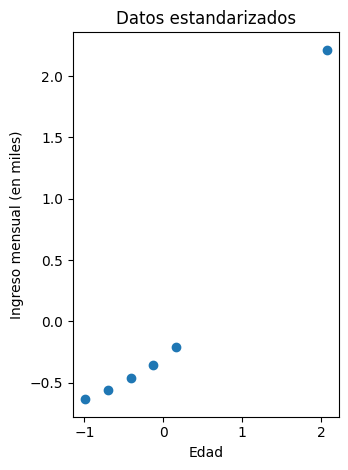

In [26]:
# Graficar los datos después de la estandarización
plt.subplot(1, 2, 2)
plt.scatter(df['Edad'], df['Ingreso mensual (en miles)'])
plt.title('Datos estandarizados')
plt.xlabel('Edad')
plt.ylabel('Ingreso mensual (en miles)')

plt.tight_layout()
plt.show()

Verás cómo las escalas de las características se han ajustado, lo que facilita la comparación y el análisis de los datos estandarizados.

#### **1.2 Estandarización de los datos**


La estandarización transforma los datos de manera que tengan una media (promedio) igual a cero y una desviación estándar igual a uno. Esto significa que los datos resultantes tendrán una distribución normal estándar.

La estandarización es robusta frente a valores atípicos (outliers) en los datos, ya que se basa en estadísticas resistentes, como la mediana y el rango intercuartil.

Es útil cuando las características tienen distribuciones diferentes y variancias diferentes.
No ajusta necesariamente los datos a un rango específico.

In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Crear un DataFrame de ejemplo
data = {
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [0.1, 0.5, 0.8, 1.2, 1.5]
}

df = pd.DataFrame(data)

# Mostrar el DataFrame con datos sin estandarizar
df

,Feature1,Feature2
0,10,0.1
1,20,0.5
2,30,0.8
3,40,1.2
4,50,1.5


In [28]:
# Estandarizar las características numéricas
scaler = StandardScaler()
df[['Feature1', 'Feature2']] = scaler.fit_transform(df[['Feature1', 'Feature2']])

# Mostrar el DataFrame con datos estandarizados
df

,Feature1,Feature2
0,-1.414214,-1.452842
1,-0.707107,-0.645707
2,0.000000,-0.040357
3,0.707107,0.766778
4,1.414214,1.372128


#### **1.3 Escalado Min-Max (Min-Max Scaling)**

El escalado Min-Max transforma los datos de manera que estén en un rango específico, por lo general [0, 1]. Esto significa que los datos resultantes estarán acotados dentro de ese rango.

El escalado Min-Max es sensible a los valores atípicos, ya que se basa en los valores mínimos y máximos de las características. Los valores atípicos pueden afectar significativamente los resultados.
Es útil cuando deseas que todas las características tengan la misma escala y rango.

Ajusta los datos a un rango específico, lo que puede ser importante en algoritmos que requieren que las características estén en un rango acotado.

> Resumen: Al valor mínimo de toda la columna lo hace cero, y al más alto lo hace 1.

In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Crear un DataFrame de ejemplo
data = {
    'Feature1': [10, 20, 30, 40, 50],
    'Feature2': [0.1, 0.5, 0.8, 1.2, 1.5]
}

# Mostrar el DataFrame con datos sin escalar
df = pd.DataFrame(data)
df

,Feature1,Feature2
0,10,0.1
1,20,0.5
2,30,0.8
3,40,1.2
4,50,1.5


In [30]:
# Escalar las características al rango [0, 1]
scaler = MinMaxScaler()
df[['Feature1', 'Feature2']] = scaler.fit_transform(df[['Feature1', 'Feature2']])

# Mostrar el DataFrame con datos escalados Min-Max
df

,Feature1,Feature2
0,0.00,0.000000
1,0.25,0.285714
2,0.50,0.500000
3,0.75,0.785714
4,1.00,1.000000


#### **1.4 Normalización L2 (Escalado por Norma L2)**

> Generalmente se ocupa en redes neuronales (bueno, en la IA en general) para evitar la pérdida de información.

La normalización L2 ajusta las características de manera que la norma L2 de cada fila sea igual a 1, lo que significa que todas las filas tendrán una longitud igual a 1 después de la normalización.

La normalización L2 es útil cuando deseas que las características tengan magnitudes comparables y es comúnmente utilizada en algoritmos de aprendizaje automático, especialmente en el aprendizaje profundo.

La norma L2 es una medida fundamental para cuantificar la magnitud de un vector y se utiliza en la normalización L2 para asegurarse de que la norma del vector sea igual a 1. (La raíz cuadrada de la suma de los cuadrados de cada característica de un dataframe)

Osease que, ajusta un conjunto de valores (normalmente un vector) para que su magnitud o longitud total sea 1.

In [31]:
import pandas as pd
from sklearn.preprocessing import Normalizer

# Crear un DataFrame de ejemplo
data = {
    'Feature1': [1, 2, 3],
    'Feature2': [0.1, 0.5, 0.8]
}

# Mostrar el DataFrame con datos sin normalización L2
df = pd.DataFrame(data)
df

,Feature1,Feature2
0,1,0.1
1,2,0.5
2,3,0.8


In [32]:
# Normalizar las características utilizando la norma L2
normalizer = Normalizer(norm='l2')
df[['Feature1', 'Feature2']] = normalizer.transform(df[['Feature1', 'Feature2']])

# Mostrar el DataFrame con datos normalizados L2
df

c:\Users\cemh0\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


,Feature1,Feature2
0,0.995037,0.099504
1,0.970143,0.242536
2,0.966235,0.257663


### 2. Mapas de calor
---

Los mapas de calor son una técnica de visualización que utiliza colores para representar valores en una matriz.

Son ampliamente utilizados en diversas disciplinas, desde análisis de datos hasta visualización de información y ciencia de datos.

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {
    'Variable1': [1, 2, 3, 4, 5],
    'Variable2': [5, 4, 3, 2, 1],
    'Variable3': [2, 3, 2, 3, 2]
}

df = pd.DataFrame(data)
df

,Variable1,Variable2,Variable3
0,1,5,2
1,2,4,3
2,3,3,2
3,4,2,3
4,5,1,2


In [34]:
# Calcular la matriz de correlación de Pearson
correlation_matrix = df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)

           Variable1  Variable2  Variable3
Variable1        1.0       -1.0        0.0
Variable2       -1.0        1.0        0.0
Variable3        0.0        0.0        1.0


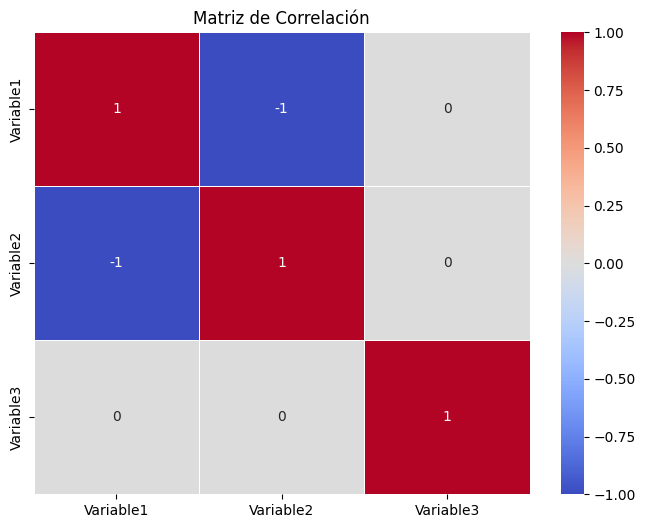

In [35]:
# Crear un mapa de calor con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Personalizar etiquetas de ejes y título
plt.title("Matriz de Correlación")
plt.show()

Donde recuerden la escala de la correlacion Pearson, la representación de colores en este caso sería la siguiente:

* **Colores Positivos (Generalmente Cálidos):** En un mapa de calor de correlación, los colores cálidos como el rojo o el amarillo suelen representar una correlación positiva entre las variables. Esto significa que cuando una variable aumenta, la otra tiende a aumentar también. Cuanto más oscuro o intenso sea el color cálido, mayor será la correlación positiva entre las variables.

* **Colores Negativos (Generalmente Fríos):** Los colores fríos como el azul o el verde suelen representar una correlación negativa entre las variables. Esto significa que cuando una variable aumenta, la otra tiende a disminuir. Cuanto más oscuro o intenso sea el color frío, mayor será la correlación negativa entre las variables.

* **Colores Neutros (Generalmente Blancos o Grises):** Los colores neutros se utilizan para representar una correlación cercana a cero o una falta de correlación significativa entre las variables. Esto significa que las variables no tienen una relación lineal clara entre sí, y sus cambios no están relacionados en gran medida.

* **Escala de Colores Continua:** En un mapa de calor de correlación, la escala de colores es continua, lo que significa que los colores se gradúan suavemente a medida que cambia el valor de correlación. Esto permite identificar matices en la fuerza de la correlación.

* **Valor Numérico Asociado:** Por lo general, se incluyen valores numéricos o coeficientes de correlación en cada celda del mapa de calor para indicar el valor exacto de la correlación entre las variables en esa ubicación.

Haciendo un **ejemplo** "práctico":

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo con características altamente correlacionadas
np.random.seed(0)
data = {'Feature1': np.random.rand(100),
        'Feature2': np.random.rand(100),
        'Target': np.random.rand(100)}  # Agregamos una variable objetivo para el ejemplo

df = pd.DataFrame(data)

df

,Feature1,Feature2,Target
0,0.548814,0.677817,0.311796
1,0.715189,0.270008,0.696343
2,0.602763,0.735194,0.377752
3,0.544883,0.962189,0.179604
4,0.423655,0.248753,0.024679
...,...,...,...
95,0.183191,0.490459,0.224317
96,0.586513,0.227415,0.097844
97,0.020108,0.254356,0.862192
98,0.828940,0.058029,0.972919


In [37]:
print("Dimensionalidad del conjunto de datos:", df.shape)

Dimensionalidad del conjunto de datos: (100, 3)


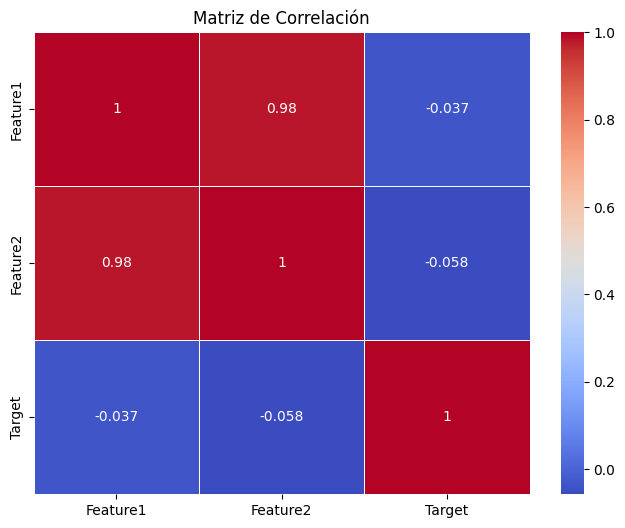

In [38]:
# Crear una relación lineal entre Feature1 y Feature2
df['Feature2'] = df['Feature1'] + np.random.rand(100) * 0.2

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación")

# Mostrar el mapa de calor
plt.show()

In [39]:
# Observar la alta correlación entre Feature1 y Feature2
print("Correlación entre Feature1 y Feature2:", correlation_matrix.loc['Feature1', 'Feature2'])

# Eliminar Feature2 debido a su alta correlación con Feature1
df.drop(columns=['Feature2'], inplace=True)

# Verificar la reducción en la dimensionalidad del conjunto de datos
print("Dimensionalidad del conjunto de datos después de eliminar Feature2:", df.shape)

Correlación entre Feature1 y Feature2: 0.9812237375172799
Dimensionalidad del conjunto de datos después de eliminar Feature2: (100, 2)


### 3. Pérdida
---

La pérdida (en inglés, "loss") en machine learning es una medida que cuantifica la discrepancia entre las predicciones de un modelo y los valores reales del conjunto de datos.

También se le conoce como función de pérdida o función de costo. La pérdida juega un papel fundamental en la optimización de modelos de machine learning, ya que se utiliza para ajustar los parámetros del modelo de manera que las predicciones se acerquen lo más posible a los valores reales.

#### Objetivo de la pérdida

Es proporcionar una medida cuantitativa de cuán bueno o malo es el rendimiento del modelo en términos de sus predicciones. Entonces, el objetivo es minimizar esta función de pérdida durante el proceso de entrenamiento del modelo para que las predicciones sean lo más precisas posible.

#### Tipos de pérdida

Existen diferentes tipos de funciones de pérdida, y la elección de la función de pérdida depende del tipo de problema de machine learning que se esté abordando.

Algunos ejemplos comunes de funciones de pérdida incluyen la pérdida cuadrática (MSE, Mean Squared Error) para **problemas de regresión**, la pérdida de entropía cruzada (cross-entropy loss) para **problemas de clasificación**, y muchas otras.

#### ¿Dónde se utiliza la pérdida?

* **Evaluación de Modelos:**

La pérdida se utiliza para evaluar el rendimiento del modelo durante el entrenamiento y la validación. Cuanto menor sea el valor de la función de pérdida, mejor será el rendimiento del modelo. Esto significa que el modelo está haciendo predicciones más precisas y ajustándose mejor a los datos.


---


* **Optimización de Modelos:**

La optimización de modelos de machine learning se basa en minimizar la función de pérdida. Los algoritmos de optimización, como el descenso de gradiente, ajustan los parámetros del modelo iterativamente para reducir la pérdida.


---

La función de pérdida también se utiliza para detectar problemas de sobreajuste (overfitting) y subajuste (underfitting).


* **Overfitting**
Cuando la pérdida en el conjunto de entrenamiento es muy baja pero la pérdida en el **conjunto de validación** es alta, puede indicar sobreajuste, lo que significa que el modelo se ha ajustado demasiado a los **datos de entrenamiento** y no generaliza bien


* **Underfitting**
Si la pérdida en ambos conjuntos es alta, puede indicar subajuste.

In [40]:
# Ejemplo de la pérdida cuadrática (MSE)
import numpy as np

# Datos de ejemplo: valores reales y predicciones del modelo
valores_reales = np.array([2.5, 3.5, 4.0, 5.1, 6.0])
predicciones = np.array([2.7, 3.2, 3.8, 4.9, 5.5])

# Calcular la pérdida cuadrática (MSE)
def calcular_mse(valores_reales, predicciones):
    diferencias = valores_reales - predicciones
    mse = np.mean(diferencias ** 2)
    return mse

mse = calcular_mse(valores_reales, predicciones)
print("Pérdida cuadrática (MSE):", mse)

Pérdida cuadrática (MSE): 0.09199999999999994


---
## Tareita :o
---

* Tener un buen inicio de semana 😃
* Realizar lo siguiente:

### **Análisis de Datos y Reducción de Dimensionalidad**


---
#### **Descripción**

A cada persona nos interesa implementar la inteligencia artificial en diferentes ámbitos, por lo que es importante saber recolectar datos, analizarlos y decidir si estos datos son útiles para entrenarlos con algún modelo de machine learning y lograr los objetivos.

Pasos a seguir:

- **Selección del Conjunto de Datos:**

  Elige un conjunto de datos de su interés. Puede ser cualquier conjunto de datos disponible en línea o de alguna fuente confiable que trate sobre un tema que les interese (por ejemplo, finanzas, salud, deportes, marketing, etc.).

- **Exploración Inicial del Conjunto de Datos:**

  Cargar el conjunto de datos y realizar una exploración inicial para entender la naturaleza de los datos, el tipo de características que contiene y el problema que se está tratando de resolver.

- **Normalización de datos:**

  Estandarizar los datos para que tengan una escala común si es conveniente.

- **Visualización de la Correlación con un Mapa de Calor:**

    Utilizar bibliotecas como Seaborn o Matplotlib en Python para crear un mapa de calor que muestre la correlación entre las características del conjunto de datos.
    Analizar el mapa de calor para identificar características altamente correlacionadas. Esto puede ayudar a determinar si hay características que están fuertemente relacionadas y podrían ser redundantes para el modelo.

- **Análisis de Características:**

    Realizar un análisis detallado de las características. Esto puede incluir estadísticas descriptivas, como media, mediana y desviación estándar, para entender la distribución de los datos.

    Investigar la relevancia de cada característica para el problema en cuestión. ¿Tiene sentido incluir todas las características en el modelo? ¿Algunas características podrían ser irrelevantes para el problema que se está tratando de resolver?

- **Conclusión sobre la Reducción de Dimensionalidad:**

    Basándose en el análisis de características y la visualización de la correlación, decidir si es fundamental eliminar algunas características para reducir la dimensionalidad de los datos.
    Si se decide eliminar características, explicar claramente por qué se eligieron esas características y qué impacto se espera en el modelo de IA.

#### **Entregable**
Preparar un documento que incluya tus hallazgos y explicar cómo la reducción de dimensionalidad podría mejorar un modelo de IA basado en el conjunto de datos seleccionado. Además de incluir tu notebook.

